# Data Exploration and Preparation

In [1]:
#import packages
import numpy as np
import pandas as pd
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets 
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import data
os.chdir("C:/Users/Yi Cai/Desktop/MSBA 2019/Intro to Business Analytics")
wine= pd.read_csv("winequality-red.csv")
wine_target = wine['quality']

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


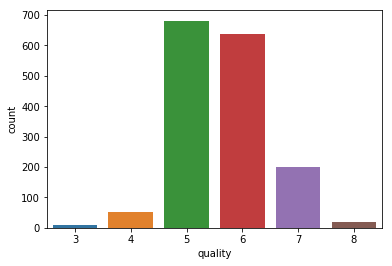

In [3]:
#Class Distribution
print(Counter(wine_target))
sns.countplot(x=wine_target,data=wine)

Counter({'Above Average': 837, 'Below Average': 734, 'Excellent': 18, 'Bad': 10})


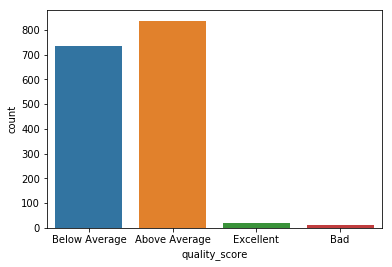

In [4]:
#Reclassify target variable
Quality_Score = []
for i in wine['quality']:
    if i >= 1 and i <= 3:
        Quality_Score.append('Bad')
    elif i >= 4 and i <= 5:
        Quality_Score.append('Below Average')
    elif i >= 6 and i <= 7:
        Quality_Score.append('Above Average')
    elif i >= 8 and i <= 10:
        Quality_Score.append('Excellent')    
wine['quality_score']=Quality_Score  

wine_target = wine['quality_score']
print(Counter(wine_target))
sns.countplot(x=wine_target,data=wine)

Counter({'Above Average': 837, 'Excellent': 818, 'Bad': 810, 'Below Average': 734})


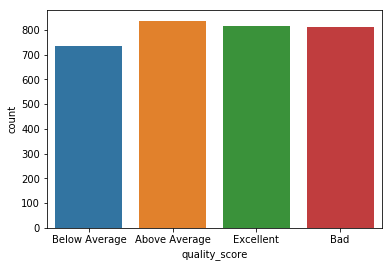

In [5]:
#Balance the data- upsampling
low= wine[wine["quality_score"]=="Bad"]
high= wine[wine["quality_score"]=="Excellent"]

from sklearn.utils import resample
X1_upsampled= resample(high,
                     replace=True,
                     n_samples=800)

X2_upsampled=resample(low,
                     replace=True,
                     n_samples=800)

X1_upsampled.shape[0]
X2_upsampled.shape[0]

wine_bal= wine.append(X1_upsampled, ignore_index=True)
wine_bal_all= wine_bal.append(X2_upsampled, ignore_index=True)

wine_target = wine_bal_all['quality_score']
print(Counter(wine_target))
sns.countplot(x=wine_target,data=wine_bal_all)

In [6]:
#Split data into train and test data
X1=wine_bal_all.iloc[:, :11]
Y1=wine_bal_all.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(
    X1, Y1, test_size=0.25, random_state=1, stratify=Y1)

In [7]:
#Standardize the Xs
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X1_std = sc.transform(X1)

In [8]:
np.unique(wine["quality_score"],return_counts =True)

(array(['Above Average', 'Bad', 'Below Average', 'Excellent'], dtype=object),
 array([837,  10, 734,  18], dtype=int64))

# Grid Search

## DecisionTree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7,8,9,10], 
                               'criterion':['gini','entropy'], 
                               "max_features":["auto", None], 
                               "class_weight":["balanced",None],
                               "max_leaf_nodes":[10,20,30,40,50]}],
                  scoring='accuracy',
                  cv=10)

gs1 = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.838682784493539
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 50}


## Logistic

In [10]:
gs_lr = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial',random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000],
                              'solver':['newton-cg','sag', 'saga','lbfgs']}],
                  scoring='accuracy',
                  cv=10)

gs_lr = gs_lr.fit(X_train,y_train)
print(gs_lr.best_score_)
print(gs_lr.best_params_)
print(gs_lr.best_estimator_)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\v

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\v

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\v

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vec

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vec

D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter wa

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.7661525635681534
{'C': 100000, 'solver': 'newton-cg'}
LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)


## KNN STD

In [11]:
np.random.seed(42)
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)
gs_knn = gs_knn.fit(X_train_std, y_train)          
print(gs_knn.best_score_)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)


0.8674447686536056
{'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# Cross Validation

## DecisionTree

In [9]:
from sklearn.tree import DecisionTreeClassifier
#build the decision tree
tree_clf_1=DecisionTreeClassifier(criterion= "gini",class_weight=balanced, max_depth=10, max_leaf_nodes= 50, random_state=42)
tree_clf_1=tree_clf_1.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
np.random.seed(42)
scoresDT=cross_val_score(tree_clf_1, X_train, y_train, scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scoresDT),np.std(scoresDT)))

CV accuracy: 0.842 +/- 0.012


## Logistic

In [17]:
log_gs = LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)
log_gs=log_gs.fit(X_train,y_train)

np.random.seed(42)
scoresLog=cross_val_score(log_gs, X_train, y_train, scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scoresLog), np.std(scoresLog)))

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

CV accuracy: 0.766 +/- 0.021


## KNN STD

In [14]:
knn_clf = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
knn_clf=knn_clf.fit(X_train_std,y_train)

scoresKNNSTD=cross_val_score(knn_clf, X_train_std, y_train, scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scoresKNNSTD), np.std(scoresKNNSTD)))

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

CV accuracy: 0.867 +/- 0.013


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# ROC Curve

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

Y1 = label_binarize(Y1, classes=['Above Average', 'Bad', 'Below Average', 'Excellent'])

clf1 = DecisionTreeClassifier(criterion= "gini",  max_depth=10, max_leaf_nodes= 50, random_state=42)

clf2 = LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

clf3 = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')



clf_labels = ['Decision Tree', 'Logistic Regression', 'KNN']
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_train,
                             y=y_train,
                             cv=10)
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))



10-fold cross validation:

ROC AUC: 0.84 (+/- 0.01) [Decision Tree]


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

ROC AUC: 0.77 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.84 (+/- 0.02) [KNN]


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

# Generalization Performance

## K-NN

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix,classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn_clf.predict(X_test_std)
y_pred_insample = knn_clf.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

#Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# Build a text report showing the main classification metrics (out-of-sample performance)
class_names=['Bad','Below Average','Above Average','Excellent']
print(classification_report(y_test, y_pred, target_names=class_names))

## Logistic

In [18]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report,confusion_matrix
y_pred_log_gs = log_gs.predict(X_test)
y_pred_insample_log_gs = log_gs.predict(X_train)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_log_gs))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample_log_gs))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred_log_gs, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample_log_gs, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_log_gs))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample_log_gs))

#Confusion Matrix
cnf_matrix_log_gs = confusion_matrix(y_test, y_pred_log_gs)
print(cnf_matrix_log_gs)

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred_log_gs,digits = 4))



Accuracy (out-of-sample): 0.76
Accuracy (in-sample): 0.77
F1 score (out-of-sample):  0.7459443523230709
F1 score (in-sample)    :  0.7602592861859379
Kappa score (out-of-sample):  0.6776954388894687
Kappa score (in-sample)    :  0.6934612594662184
[[115   8  46  40]
 [  0 203   0   0]
 [ 46  26 104   7]
 [ 20   0   0 185]]
               precision    recall  f1-score   support

Above Average     0.6354    0.5502    0.5897       209
          Bad     0.8565    1.0000    0.9227       203
Below Average     0.6933    0.5683    0.6246       183
    Excellent     0.7974    0.9024    0.8467       205

  avg / total     0.7463    0.7588    0.7481       800



## Decision Tree

In [19]:
y_pred_DT =tree_clf_1.predict(X_test)
y_pred_insample_DT = tree_clf_1.predict(X_train)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_DT))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample_DT))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred_DT, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample_DT, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_DT))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample_DT))

#Confusion Matrix
cnf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(cnf_matrix_DT)

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred_DT,digits = 4))

Accuracy (out-of-sample): 0.85
Accuracy (in-sample): 0.89
F1 score (out-of-sample):  0.8468061517524877
F1 score (in-sample)    :  0.8893415771821944
Kappa score (out-of-sample):  0.8033669248170104
Kappa score (in-sample)    :  0.8560766817683911
[[136   5  60   8]
 [  0 203   0   0]
 [ 39   5 138   1]
 [  0   0   0 205]]
               precision    recall  f1-score   support

Above Average     0.7771    0.6507    0.7083       209
          Bad     0.9531    1.0000    0.9760       203
Below Average     0.6970    0.7541    0.7244       183
    Excellent     0.9579    1.0000    0.9785       205

  avg / total     0.8498    0.8525    0.8492       800



# Learning Curve

In [20]:
from __future__ import division, print_function, unicode_literals

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()                    
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") 
    plt.ylabel("Score")             
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1)  

    plt.grid() 

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    
  
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") 
    return plt 

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

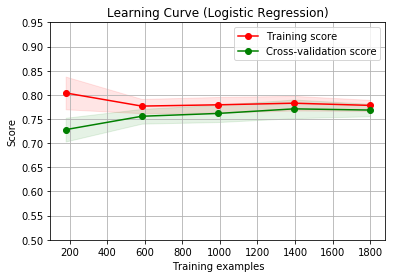

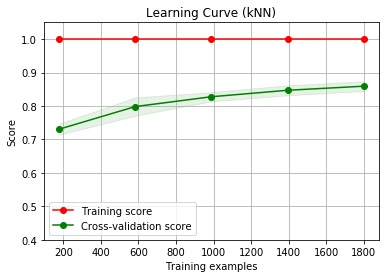

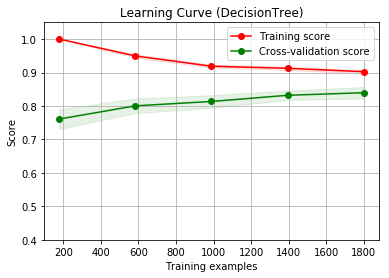

In [29]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pyplot as plt


title = "Learning Curve (Logistic Regression)"


cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
estimator = clf2 
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 0.95), cv=cv, n_jobs=1)

plt.show() 

title = "Learning Curve (kNN)"

estimator = clf3
plot_learning_curve(estimator, title, X_train_std, y_train, (0.4, 1.05), cv=cv, n_jobs=4)

plt.show()


title = "Learning Curve (DecisionTree)"

estimator = clf1 
plot_learning_curve(estimator, title, X_train, y_train, (0.4, 1.05), cv=cv, n_jobs=4)

plt.show() 

# Final Model- Decision Tree

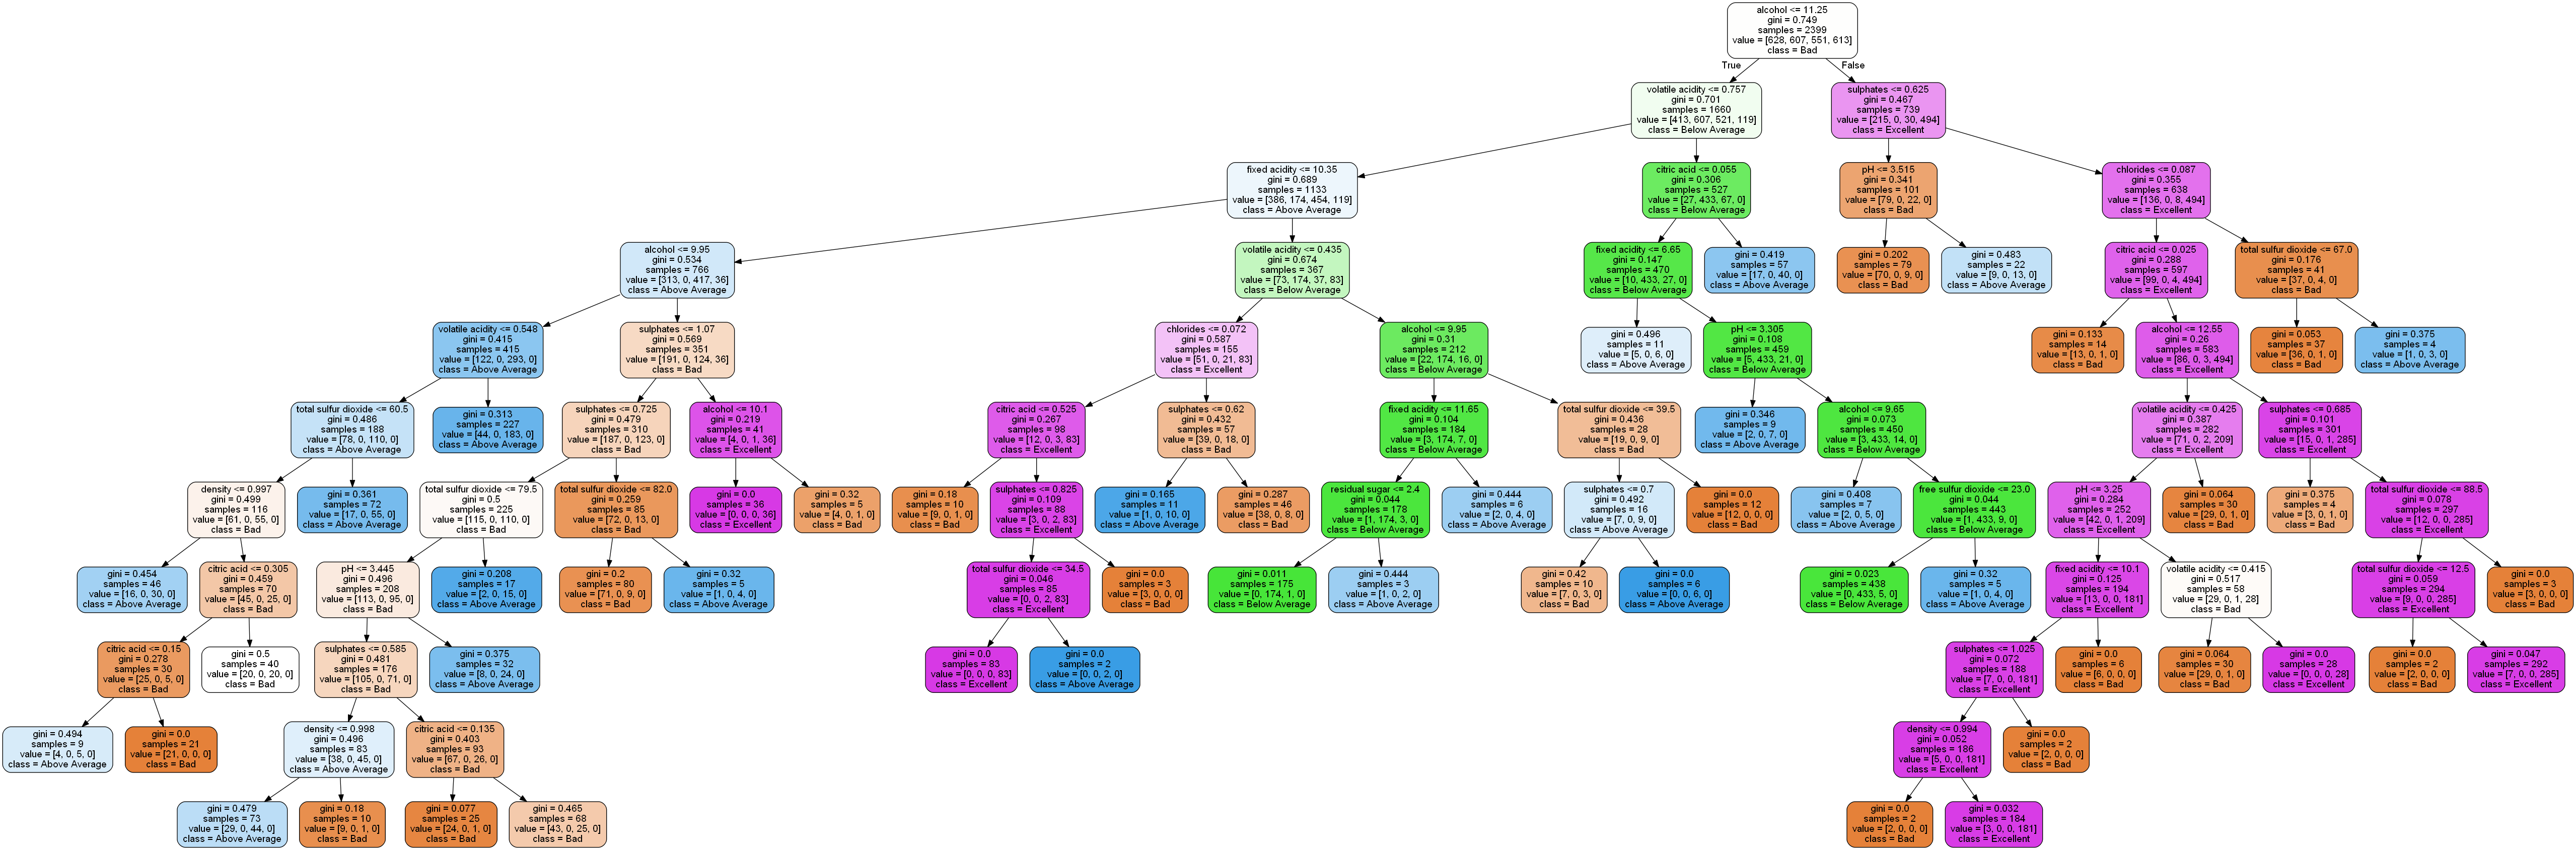

In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import os

class_names=['Bad','Below Average','Above Average','Excellent']

os.chdir("/Users/Yi Cai/Desktop/MSBA 2019/Intro to Business Analytics")

PROJECT_ROOT_DIR="."
CHAPTER_ID= "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID,fig_id)
export_graphviz(tree_clf_1, out_file=image_path("wine_tree.dot"),
                feature_names= wine.columns.values[:11],
                class_names= class_names,
                rounded=True,
                filled= True)

#print out the decision tree
path_png= os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID, "wine_tree.png")
Image(path_png)
